# E-commerce Customer Analytics and Personalization Project

## Overview
This notebook covers advanced analytics techniques for e-commerce data, including **customer segmentation**, **cohort analysis**, **churn prediction**, and **personalized marketing recommendations**. These techniques help businesses understand their customers better and make data-driven decisions.

## 1. Data Preparation and Exploration

### 1.1 Importing Libraries

We'll start by importing the necessary libraries for our analysis. These libraries provide tools for data manipulation, visualization, and machine learning.

In [4]:
# Import basic data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Import other necessary libraries
import os
from sklearn.metrics.pairwise import cosine_similarity

# Set the environment variable to avoid memory leak issue on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '1'

After running this code block, we have imported all the necessary tools for our analysis. Here's a breakdown of what each library does:

- **pandas** (as pd): A powerful data manipulation library. We'll use it to load, clean, and analyze our dataset.
- **numpy** (as np): A library for numerical computing. It's used for array operations and mathematical functions.
- **matplotlib.pyplot** (as plt) and **seaborn** (as sns): These are visualization libraries that we'll use to create graphs and charts.
- **sklearn**: This is the Scikit-learn library, which provides tools for machine learning. We've imported specific modules for clustering (KMeans), data preprocessing (StandardScaler), model training (train_test_split), classification (RandomForestClassifier), and model evaluation (classification_report).

The last two lines set up our plotting style to make our visualizations consistent and visually appealing.

### 1.2 Loading and Cleaning Data

Now we'll load our e-commerce data and perform some initial cleaning steps. Data cleaning is a crucial step in any data analysis project, as it ensures our data is accurate and ready for analysis.

In [5]:
# Load the data
df = pd.read_csv('ecommerce_data_week2.csv')

# Display first few rows
print("First few rows of our data:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

First few rows of our data:
   customer_id  order_id  order_date  product_id product_category  \
0           52      1001  2023-01-01         134           Sports   
1           93      1002  2023-01-02         108      Electronics   
2           15      1003  2023-01-03         140           Sports   
3           72      1004  2023-01-04         183           Sports   
4           61      1005  2023-01-05         142       Home Decor   

   product_price  quantity     revenue  discount web_traffic_source  \
0            392         3  132.491483        45             Google   
1             77         4  179.868736        43             Google   
2            375         1  350.985646        43           Facebook   
3            381         3  360.287920        30             Direct   
4            223         3  336.964856        32           Facebook   

  customer_age_group customer_region  customer_lifetime_value  
0              26-35          London                     1123  
1 

After running this code, we've accomplished two important tasks:

1. **Data Loading**: We've used pandas' `read_csv()` function to load our e-commerce data from a CSV file into a DataFrame called `df`. This DataFrame is now our main data structure for analysis.

2. **Initial Data Inspection**: 
   - We've printed the first few rows of the data using `df.head()`. This gives us a quick look at the structure of our data and the types of information we're working with.
   - We've checked for missing values using `df.isnull().sum()`. This shows us how many null or missing values are in each column, which is crucial information for our data cleaning process.

Understanding the structure of our data and identifying missing values are critical first steps in data analysis. They help us plan our cleaning and preprocessing steps.

In [6]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['customer_age_group', 'customer_region', 'web_traffic_source']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Fill missing numerical values with median
numerical_columns = ['customer_lifetime_value']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

print("Data types after cleaning:")
print(df.dtypes)

Data types after cleaning:
customer_id                         int64
order_id                            int64
order_date                 datetime64[ns]
product_id                          int64
product_category                   object
product_price                       int64
quantity                            int64
revenue                           float64
discount                            int64
web_traffic_source                 object
customer_age_group                 object
customer_region                    object
customer_lifetime_value             int64
dtype: object


In this code block, we've performed several important data cleaning steps:

1. **Date Conversion**: We converted the 'order_date' column to datetime format. This allows us to perform time-based operations and analysis more easily.

2. **Handling Missing Values**: 
   - For categorical columns (like 'customer_age_group', 'customer_region', and 'web_traffic_source'), we filled missing values with 'Unknown'. This is a common practice when we don't want to lose data but can't make assumptions about the missing values.
   - For numerical columns (like 'customer_lifetime_value'), we filled missing values with the median of that column. We use the median instead of the mean because it's less sensitive to outliers.

3. **Data Type Check**: After our cleaning steps, we printed the data types of our columns to ensure that our changes were applied correctly and that each column has the appropriate data type.

These cleaning steps prepare our data for analysis by ensuring that there are no missing values and that our data types are appropriate for the kind of analysis we want to perform.

### 1.3 Exploratory Data Analysis

Now that our data is clean, let's perform some basic **exploratory data analysis** (EDA) to understand our dataset better. EDA helps us identify patterns, spot anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations.

In [7]:
# Basic statistics
print("Basic statistical summary of numerical columns:")
print(df.describe())

Basic statistical summary of numerical columns:
       customer_id     order_id           order_date  product_id  \
count  1000.000000  1000.000000                 1000  1000.00000   
mean     50.128000  1500.500000  2024-05-14 12:00:00   149.94800   
min       1.000000  1001.000000  2023-01-01 00:00:00   101.00000   
25%      24.000000  1250.750000  2023-09-07 18:00:00   125.00000   
50%      51.000000  1500.500000  2024-05-14 12:00:00   149.00000   
75%      75.000000  1750.250000  2025-01-19 06:00:00   175.00000   
max     100.000000  2000.000000  2025-09-26 00:00:00   200.00000   
std      29.573505   288.819436                  NaN    29.13304   

       product_price     quantity      revenue     discount  \
count    1000.000000  1000.000000  1000.000000  1000.000000   
mean      259.177000     2.473000   395.186639    24.684000   
min        10.000000     1.000000    91.605571     0.000000   
25%       136.000000     1.000000   280.545795    13.000000   
50%       267.500000    

This code provides a statistical summary of our numerical columns:

- **count**: The number of non-null values in each column.
- **mean**: The average value.
- **std**: The standard deviation, which measures the amount of variation in the dataset.
- **min** and **max**: The minimum and maximum values in each column.
- **25%, 50%, 75%**: The quartiles of the data. 50% is the median.

This summary gives us a quick overview of the distribution of our numerical data. We can see the central tendencies, spread, and potential outliers in our data.

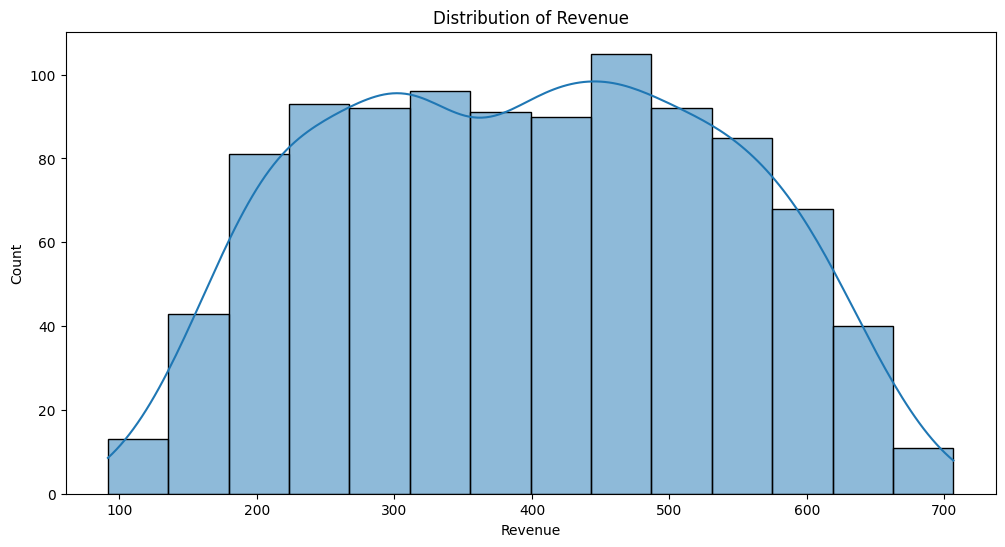

In [8]:
# Visualize distribution of revenue
plt.figure(figsize=(12, 6))
sns.histplot(df['revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.show()

This visualization shows the distribution of revenue in our dataset:

- The x-axis represents different revenue values.
- The y-axis shows the frequency of each revenue value.
- The blue bars represent a histogram of the data.
- The overlaid line is a Kernel Density Estimate (KDE), which provides a smoothed version of the histogram.

From this plot, we can observe:
1. The shape of the distribution (Is it normal? Skewed?)
2. Any potential outliers or unusual patterns
3. The range and central tendency of our revenue data

This kind of visualization is crucial for understanding the overall behavior of our key metrics like revenue.

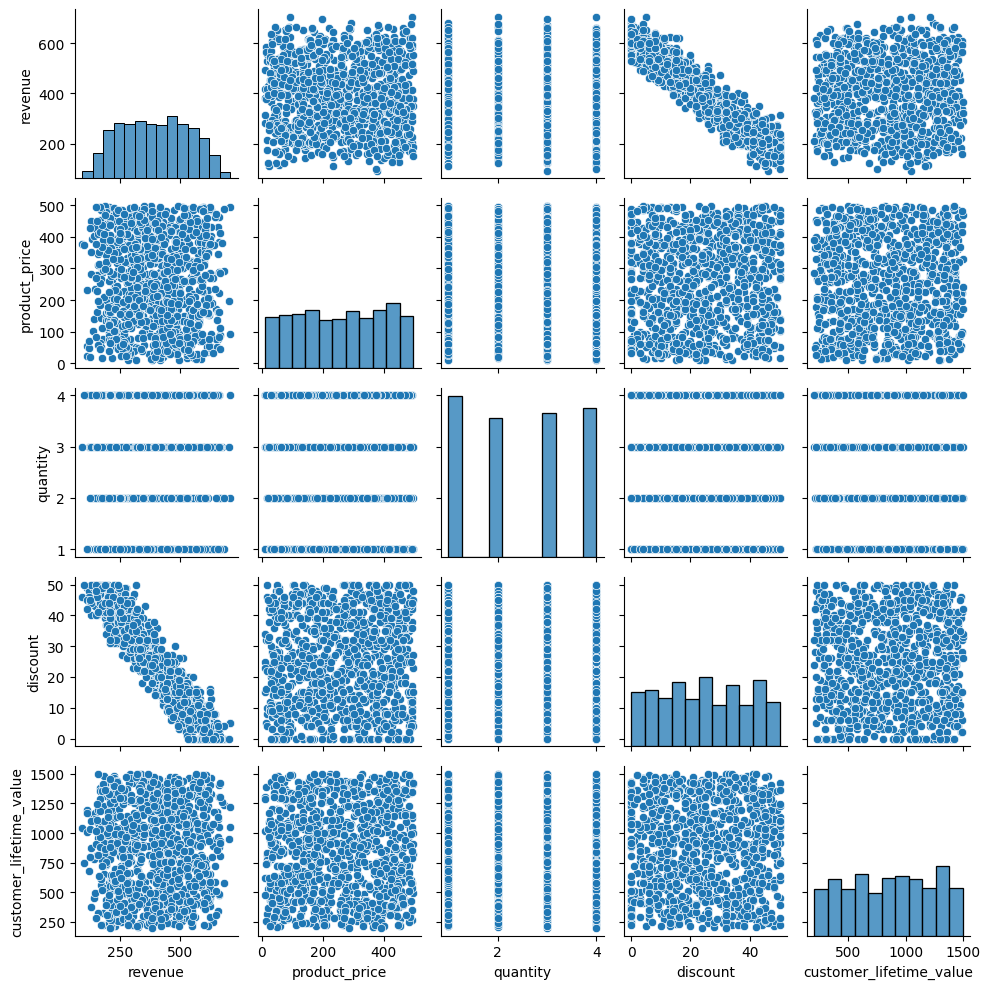

In [9]:
# Visualize relationships between numerical variables
numerical_cols = ['revenue', 'product_price', 'quantity', 'discount', 'customer_lifetime_value']
sns.pairplot(df[numerical_cols], height=2)
plt.tight_layout()
plt.show()

This pairplot visualizes the relationships between our key numerical variables:

- Each scatter plot shows the relationship between two variables.
- The diagonal shows the distribution of each variable.

From this visualization, we can:
1. Identify correlations between variables (positive, negative, or no correlation)
2. Spot any unusual patterns or clusters in the data
3. Get a sense of the distribution of each variable

This is particularly useful for understanding how different aspects of our e-commerce data relate to each other. For example, we might see how product price relates to quantity sold, or how customer lifetime value relates to revenue.

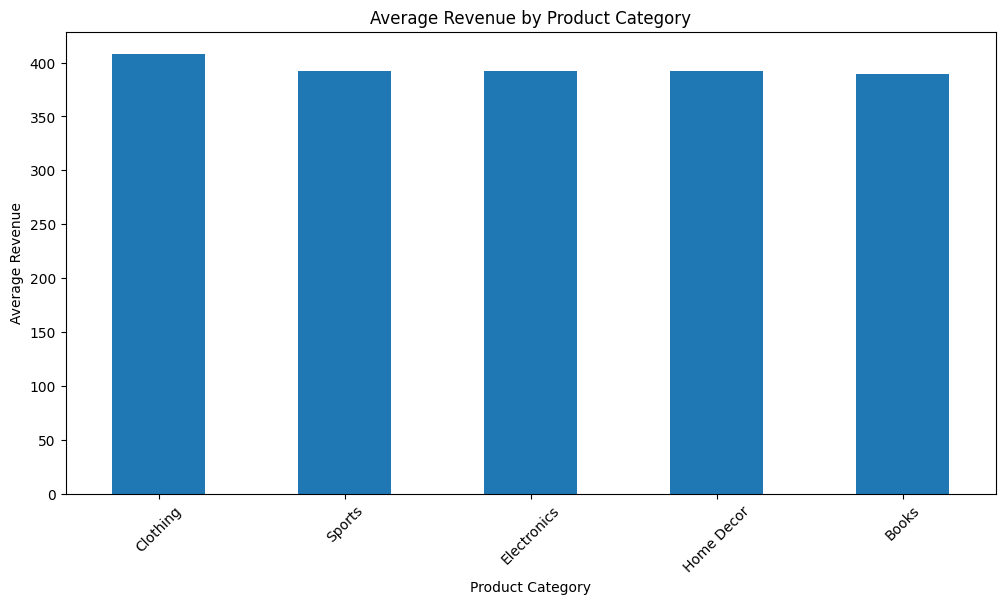

In [10]:
# Visualize average revenue by product category
plt.figure(figsize=(12, 6))
avg_revenue_by_category = df.groupby('product_category')['revenue'].mean().sort_values(ascending=False)
avg_revenue_by_category.plot(kind='bar')
plt.title('Average Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

This bar chart visualizes the average revenue for each product category:

- The x-axis shows different product categories.
- The y-axis represents the average revenue for each category.
- The bars are sorted in descending order of average revenue.

From this visualization, we can:
1. Identify which product categories generate the highest average revenue
2. Compare the performance of different product categories
3. Spot any categories that significantly outperform or underperform compared to others

This information is valuable for strategic decision-making, such as where to focus marketing efforts or which product lines to expand.

## 2. Customer Segmentation

In this section, we'll perform **customer segmentation** using the K-means clustering algorithm. Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests, and spending habits.

### 2.1 Feature Selection and Engineering

In [11]:
# Select relevant features for segmentation
features = ['customer_lifetime_value', 'revenue', 'quantity']

# Group by customer_id and calculate mean of selected features
X = df.groupby('customer_id')[features].mean().reset_index()

print("First few rows of aggregated customer data:")
print(X.head())

First few rows of aggregated customer data:
   customer_id  customer_lifetime_value     revenue  quantity
0            1               795.625000  357.093959  2.812500
1            2               986.615385  390.009100  2.461538
2            3               848.833333  366.784139  2.083333
3            4               785.818182  296.194449  2.090909
4            5               821.545455  396.989723  2.454545


In this step, we're preparing our data for customer segmentation:

1. We selected three key features for segmentation: 'customer_lifetime_value', 'revenue', and 'quantity'. These features give us a good representation of a customer's value and purchasing behavior.

2. We then grouped the data by 'customer_id' and calculated the mean of these features for each customer. This gives us a single row per customer, summarizing their overall behavior.

3. The result, stored in the variable `X`, is a new DataFrame where each row represents a unique customer, and the columns are the average values of our selected features for that customer.

This aggregation step is crucial because it allows us to perform customer-level analysis rather than transaction-level analysis.

In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

print("First few rows of scaled data:")
print(X_scaled[:5])

First few rows of scaled data:
[[-0.61153738 -0.83120975  1.0234201 ]
 [ 0.96885274 -0.15460887  0.04053623]
 [-0.17125383 -0.63201922 -1.01864456]
 [-0.69268596 -2.08305498 -0.9974283 ]
 [-0.39705312 -0.01111578  0.020952  ]]


In this step, we're scaling our features using StandardScaler:

1. **Scaling** is a crucial preprocessing step for many machine learning algorithms, including K-means clustering. It ensures that all features contribute equally to the result.

2. **StandardScaler** transforms the data so that it has a mean of 0 and a standard deviation of 1. This is also known as **standardization** or **z-score normalization**.

3. We apply the scaler to our features and store the result in `X_scaled`. Each column in `X_scaled` now has a mean of 0 and standard deviation of 1.

4. The print statement shows us the first few rows of our scaled data. You'll notice that the values are now centered around 0 and typically range between -3 and 3 (as most data falls within 3 standard deviations in a normal distribution).

Scaling is particularly important for K-means clustering because the algorithm uses distances between points. If one feature has a much larger scale than others, it would dominate the distance calculations and skew our results.

### 2.2 Implementing K-means Clustering

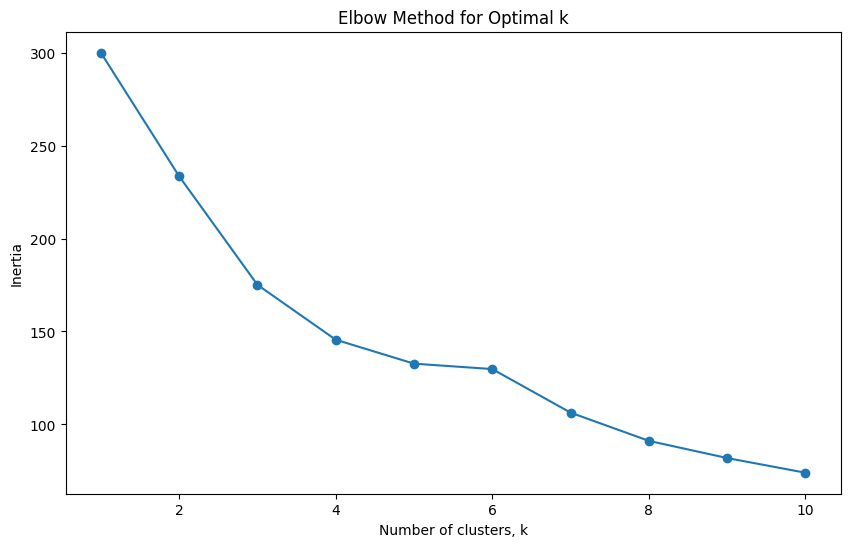

In [13]:
# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

This code block implements the **elbow method** to help us determine the optimal number of clusters for our K-means algorithm:

1. We run K-means clustering for different numbers of clusters (k) from 1 to 10.

2. For each k, we calculate the **inertia**, which is the sum of squared distances of samples to their closest cluster center. As k increases, inertia will decrease (each point will be closer to its cluster center).

3. We plot k against inertia. The resulting plot typically looks like an arm (hence "elbow method"). The "elbow" of this plot, where the rate of decrease sharply shifts, can suggest a good number of clusters to use.

4. The 'random_state=42' argument ensures reproducibility of our results.

Looking at this plot, we want to choose a k where adding another cluster doesn't give much better modeling of the data. This is usually at the 'elbow' point where the inertia starts decreasing more slowly.

In [14]:
# Perform K-means clustering
optimal_k = 3  # Choose based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Segment'] = kmeans.fit_predict(X_scaled)

print("First few rows with segment labels:")
print(X.head())

First few rows with segment labels:
   customer_id  customer_lifetime_value     revenue  quantity  Segment
0            1               795.625000  357.093959  2.812500        2
1            2               986.615385  390.009100  2.461538        1
2            3               848.833333  366.784139  2.083333        0
3            4               785.818182  296.194449  2.090909        2
4            5               821.545455  396.989723  2.454545        2


In this step, we're applying the K-means clustering algorithm to our data:

1. We set `optimal_k = 3` based on our interpretation of the elbow plot. This means we're dividing our customers into 3 segments.

2. We create a new KMeans object with `n_clusters=optimal_k`.

3. We use the `fit_predict` method to both fit the model to our data and predict the cluster for each customer. The results are added as a new 'Segment' column to our DataFrame `X`.

4. The print statement shows us the first few rows of our data, now including the segment labels (0, 1, or 2) for each customer.

This step completes our customer segmentation. Each customer is now assigned to one of three segments based on their lifetime value, revenue, and quantity of purchases.

### 2.3 Analyzing Segments

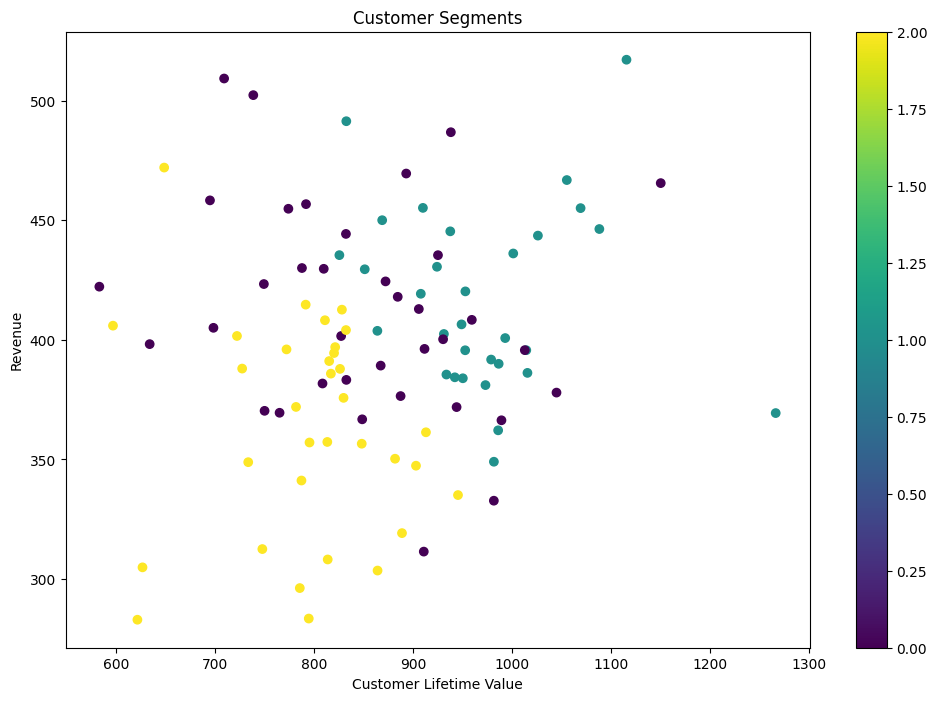

In [15]:
# Visualize segments
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X['customer_lifetime_value'], X['revenue'], c=X['Segment'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Revenue')
plt.colorbar(scatter)
plt.show()

This visualization helps us understand how our customer segments are distributed:

1. We're creating a scatter plot where each point represents a customer.

2. The x-axis shows the customer lifetime value, and the y-axis shows the revenue.

3. Each point is colored according to its segment (0, 1, or 2).

4. The 'viridis' colormap is used to differentiate between segments.

This plot allows us to visually inspect how well our segmentation has worked. We should be able to see distinct clusters of customers, which could represent different types of customers (e.g., high-value customers, average customers, low-value customers).

Segment Characteristics:
         customer_lifetime_value     revenue  quantity
Segment                                               
0                     851.418926  412.444902  2.065673
1                     970.609452  417.139986  2.684701
2                     794.332246  362.839152  2.639893


<Figure size 1200x600 with 0 Axes>

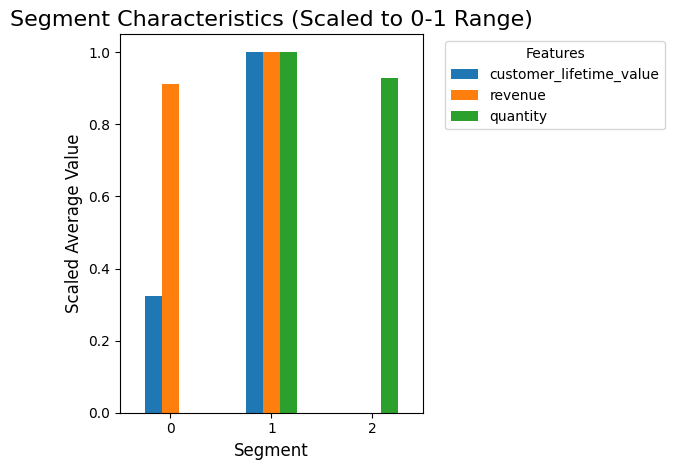

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Analyze segment characteristics
segment_stats = X.groupby('Segment')[features].mean()
print("Segment Characteristics:")
print(segment_stats)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
segment_stats_scaled = pd.DataFrame(scaler.fit_transform(segment_stats), 
                                    columns=segment_stats.columns, 
                                    index=segment_stats.index)

# Visualize scaled segment characteristics
plt.figure(figsize=(12, 6))
segment_stats_scaled.plot(kind='bar')
plt.title('Segment Characteristics (Scaled to 0-1 Range)', fontsize=16)
plt.ylabel('Scaled Average Value', fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.legend(title='Features', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

This final step in our segmentation analysis helps us understand the characteristics of each segment:

1. We calculate the mean values of our features for each segment. This gives us a summary of what each segment looks like in terms of customer lifetime value, revenue, and quantity.

2. The printed table shows these average values for each segment. This can help us label our segments (e.g., "high-value customers", "frequent buyers", etc.).

3. We then create a bar plot to visualize these characteristics. Each group of bars represents a segment, and the different colored bars within each group represent our different features.

This visualization makes it easy to compare segments across different features. For example, we might see that one segment has high lifetime value and revenue but lower quantity, suggesting these could be customers who make infrequent but large purchases.

Understanding these segment characteristics is crucial for developing targeted marketing strategies and improving customer relationships.

## 3. Cohort Analysis

In this section, we'll perform a **cohort analysis** to understand customer retention over time. Cohort analysis is a type of behavioral analytics that takes the data from a given dataset and rather than looking at all users as one unit, it breaks them into related groups for analysis.

### 3.1 Creating Cohorts

In [17]:
# Create cohorts based on the first purchase month
df['CohortDate'] = df.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')
df['CohortIndex'] = (df['order_date'].dt.to_period('M') - df['CohortDate']).apply(lambda x: x.n)

print("Sample of cohort data:")
print(df[['customer_id', 'order_date', 'CohortDate', 'CohortIndex']].head(10))

Sample of cohort data:
   customer_id order_date CohortDate  CohortIndex
0           52 2023-01-01    2023-01            0
1           93 2023-01-02    2023-01            0
2           15 2023-01-03    2023-01            0
3           72 2023-01-04    2023-01            0
4           61 2023-01-05    2023-01            0
5           21 2023-01-06    2023-01            0
6           83 2023-01-07    2023-01            0
7           87 2023-01-08    2023-01            0
8           75 2023-01-09    2023-01            0
9           75 2023-01-10    2023-01            0


In this step, we're preparing our data for cohort analysis:

1. We create a 'CohortDate' column, which represents the month of a customer's first purchase. We do this by:
   - Grouping the data by 'customer_id'
   - Finding the minimum 'order_date' for each customer (their first purchase)
   - Converting this date to a period representing the month

2. We then create a 'CohortIndex' column, which represents how many months have passed since a customer's first purchase. We calculate this by:
   - Subtracting the 'CohortDate' from each 'order_date'
   - Converting the result to a number of months

3. The print statement shows us a sample of our data with these new columns.

This preparation allows us to group customers who made their first purchase in the same month (cohort) and track their behavior over time.

### 3.2 Calculating Retention Rates

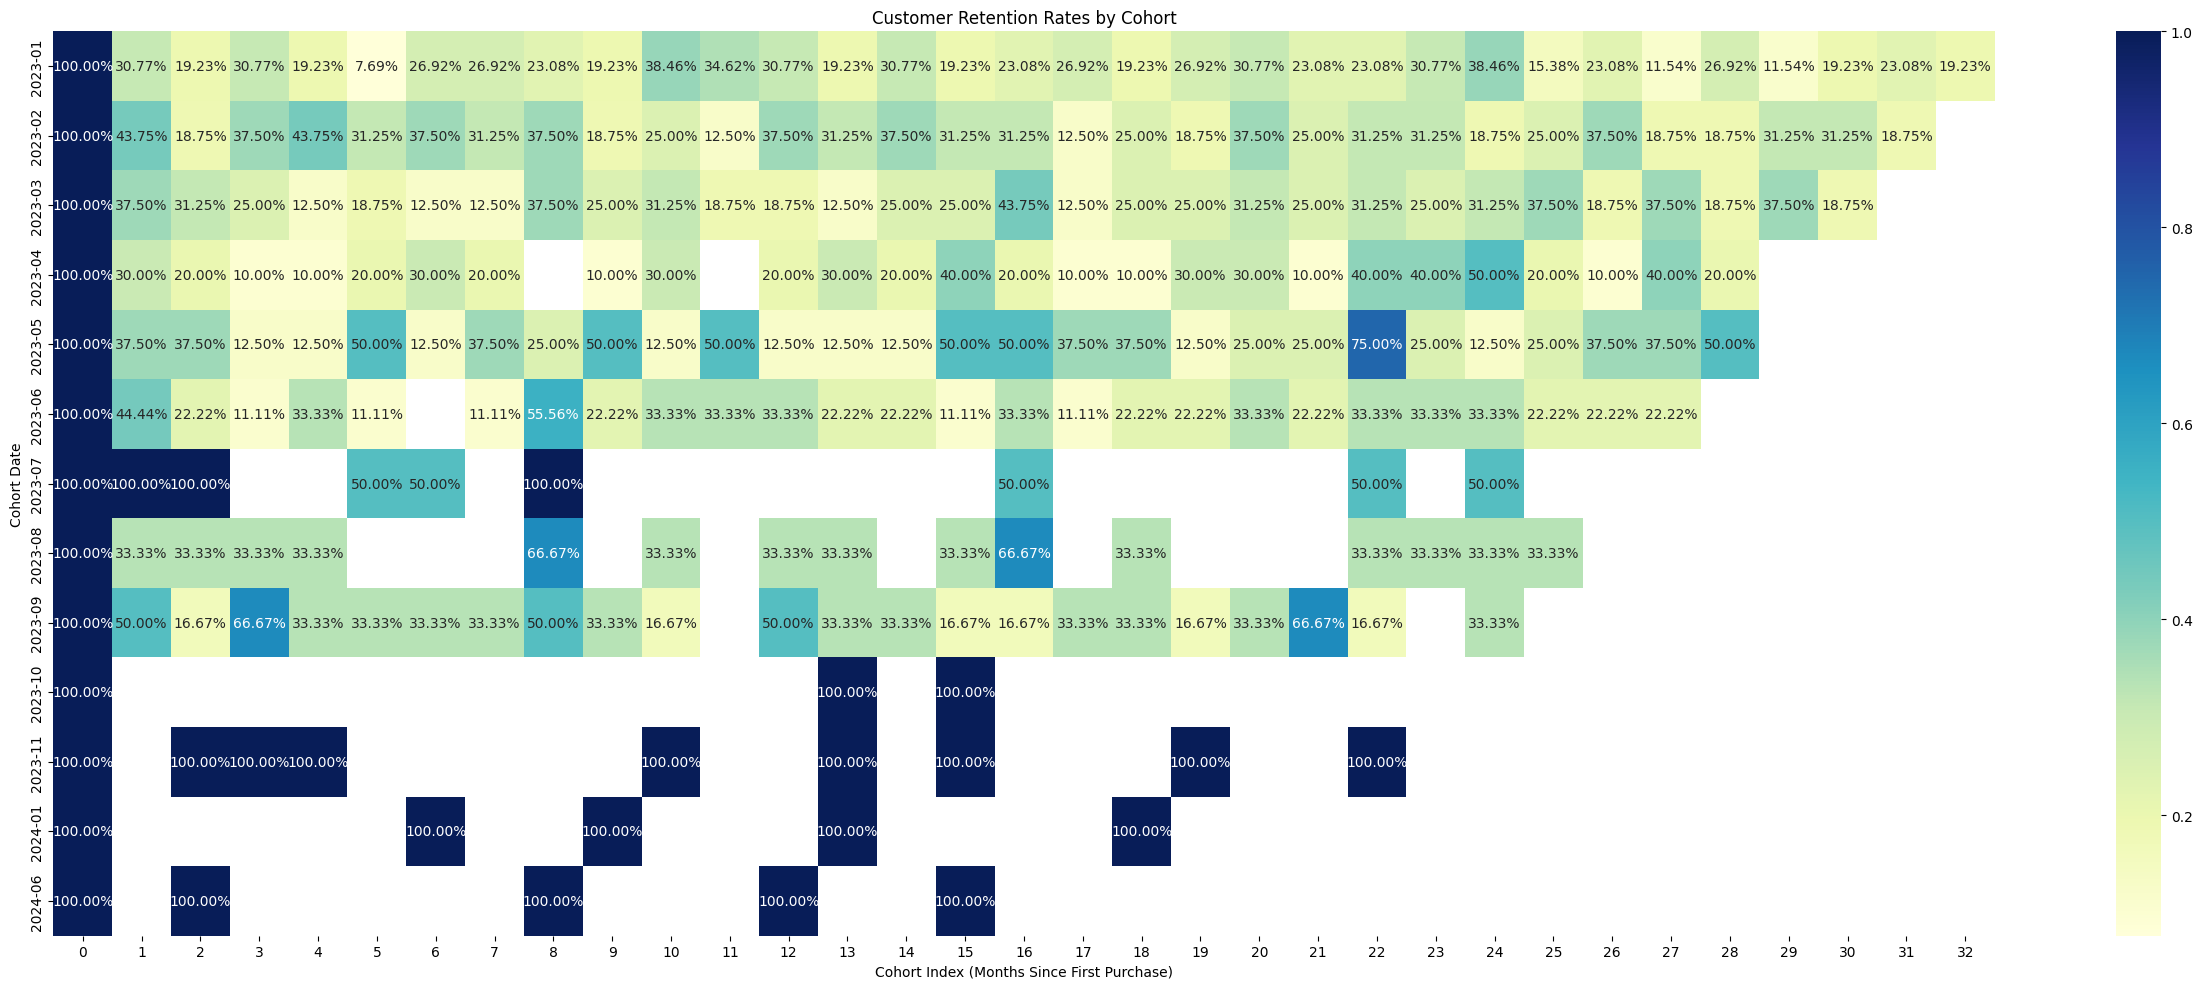

In [26]:
# Calculate retention rates
cohort_data = df.groupby(['CohortDate', 'CohortIndex'])['customer_id'].nunique().reset_index()
cohort_data = cohort_data.pivot(index='CohortDate', columns='CohortIndex', values='customer_id')
retention_rates = cohort_data.divide(cohort_data.iloc[:, 0], axis=0)

# Visualize retention rates
plt.figure(figsize=(25,10 ))
sns.heatmap(retention_rates, annot=True, cmap='YlGnBu', fmt='.2%')
plt.title('Customer Retention Rates by Cohort')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort Date')
plt.tight_layout()
plt.show()

In this final step of our cohort analysis, we're calculating and visualizing customer retention rates:

1. We first group our data by 'CohortDate' and 'CohortIndex', counting the unique customers in each group.

2. We then pivot this data to create a matrix where each row represents a cohort (based on first purchase month) and each column represents the number of months since first purchase.

3. To get retention rates, we divide each value by the initial number of customers in that cohort (the first column). This gives us the percentage of customers from each cohort that made a purchase in each subsequent month.

4. We visualize this data using a heatmap:
   - Each row represents a cohort (customers who made their first purchase in a specific month)
   - Each column represents the number of months since the first purchase
   - The color intensity represents the retention rate (darker colors indicate higher retention)
   - The actual retention rate percentages are annotated in each cell

This visualization allows us to easily see patterns in customer retention. For example:
- How retention rates change over time for each cohort
- Whether newer or older cohorts have better retention
- If there are any seasonal patterns in retention

Understanding these patterns can help in developing strategies to improve customer retention and lifetime value.

## 4. Churn Prediction Model

In this section, we'll build a model to predict customer **churn**. Churn refers to when a customer stops doing business with a company. Predicting churn can help businesses take proactive steps to retain customers.

### 4.1 Defining Churn

In [19]:
# Define a churn period (e.g., 3 months without a purchase)
churn_threshold = pd.Timedelta(days=90)
df['LastPurchaseDate'] = df.groupby('customer_id')['order_date'].transform('max')
df['DaysSinceLastPurchase'] = (df['order_date'].max() - df['LastPurchaseDate']).dt.days
df['Churned'] = (df['DaysSinceLastPurchase'] > churn_threshold.days).astype(int)

print(df[['customer_id', 'LastPurchaseDate', 'DaysSinceLastPurchase', 'Churned']].head(10))

   customer_id LastPurchaseDate  DaysSinceLastPurchase  Churned
0           52       2025-08-14                     43        0
1           93       2025-07-04                     84        0
2           15       2025-09-05                     21        0
3           72       2025-04-18                    161        1
4           61       2025-08-07                     50        0
5           21       2025-07-17                     71        0
6           83       2025-04-02                    177        1
7           87       2025-08-22                     35        0
8           75       2025-06-23                     95        1
9           75       2025-06-23                     95        1


In this step, we're defining and calculating churn for our customers:

1. We define a **churn threshold** of 90 days (3 months). This means we consider a customer to have churned if they haven't made a purchase in the last 90 days.

2. We calculate the 'LastPurchaseDate' for each customer by finding the maximum 'order_date' for each customer_id.

3. We then calculate 'DaysSinceLastPurchase' by subtracting the 'LastPurchaseDate' from the most recent date in our dataset.

4. Finally, we create a 'Churned' column. This is 1 (True) if 'DaysSinceLastPurchase' is greater than our churn threshold, and 0 (False) otherwise.

5. We print a sample of our data to see these new columns.

This definition of churn will be the basis for our predictive model. It's important to note that the definition of churn can vary depending on the business and industry.

### 4.2 Preparing Features for Churn Prediction

In [20]:
# Aggregate data at customer level
customer_features = df.groupby('customer_id').agg({
    'revenue': 'mean',
    'quantity': 'mean',
    'discount': 'mean',
    'customer_lifetime_value': 'first',
    'Churned': 'first'
})

# Prepare features and target
X = customer_features.drop('Churned', axis=1)
y = customer_features['Churned']

print(X.head())

                revenue  quantity   discount  customer_lifetime_value
customer_id                                                          
1            357.093959  2.812500  28.500000                      608
2            390.009100  2.461538  24.153846                      494
3            366.784139  2.083333  27.916667                     1301
4            296.194449  2.090909  34.363636                      606
5            396.989723  2.454545  22.909091                      579


In this step, we're preparing our data for the churn prediction model:

1. We aggregate our data at the customer level. For each customer, we calculate:
   - Mean revenue
   - Mean quantity of items purchased
   - Mean discount received
   - Customer lifetime value (we take the first value as this should be constant for each customer)
   - Churn status (again, we take the first value as this should be the same for all rows of a customer)

2. We then separate our features (X) from our target variable (y):
   - X contains all the columns except 'Churned'
   - y contains only the 'Churned' column

3. We print the first few rows of X to verify our feature set.

This preparation gives us a dataset where each row represents a unique customer, with features that summarize their purchasing behavior, and a target variable indicating whether they have churned.

### 4.3 Training and Evaluating Churn Model

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.40      0.29      0.33         7

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



In this final step of our churn prediction model, we're training the model and evaluating its performance:

1. We split our data into training and testing sets. We use 80% of the data for training and reserve 20% for testing. This split allows us to assess how well our model generalizes to unseen data.

2. We create a **Random Forest Classifier**. Random Forest is an ensemble learning method that constructs multiple decision trees and merges them to get a more accurate and stable prediction.

3. We train the model on our training data using the `fit` method.

4. We use the trained model to make predictions on our test set.

5. Finally, we print a classification report, which includes several metrics:
   - **Precision**: The ratio of correctly predicted positive observations to the total predicted positive observations.
   - **Recall**: The ratio of correctly predicted positive observations to all actual positive observations.
   - **F1-score**: The harmonic mean of Precision and Recall, providing a single score that balances both metrics.
   - **Support**: The number of occurrences of each class in the test set.

This report helps us understand how well our model is performing in predicting customer churn. We can use these insights to refine our model or to start developing strategies to prevent churn for high-risk customers.

## 5. Personalized Marketing Recommendation Engine

In this section, we'll implement a simple recommendation engine using collaborative filtering. This can be used to suggest products to customers based on the purchasing behavior of similar customers.

### 5.1 Preparing Data for Recommendations

In [22]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='customer_id', columns='product_id', values='quantity', fill_value=0)
print(user_item_matrix.shape)
print(user_item_matrix.head())

(100, 100)
product_id   101  102  103  104  105  106  107  108  109  110  ...  191  192  \
customer_id                                                    ...             
1            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  ...  0.0  0.0   
2            0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3            1.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  3.0   
5            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

product_id   193  194  195  196  197  198  199  200  
customer_id                                          
1            0.0  0.0  0.0  0.0  4.0  0.0  3.0  3.0  
2            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4            0.0  0.0  0.0  0.0  0.0  1.5  0.0  0.0  
5            0.0  3.0  0.0  2.0  0.0  0.0  0.0  0.0  

[5 rows x 100 columns]


In this step, we're preparing our data for the recommendation engine:

1. We create a **user-item matrix** using the `pivot_table` function. This matrix has:
   - Rows representing customers (customer_id)
   - Columns representing products (product_id)
   - Values representing the quantity of each product purchased by each customer

2. We fill any missing values with 0, assuming that if a customer hasn't purchased a product, their quantity is 0.

3. We print the shape of the matrix to see how many customers and products we have.

4. We also print the first few rows of the matrix to see what it looks like.

This user-item matrix is the foundation for our collaborative filtering approach. It allows us to see patterns in purchasing behavior across all customers and products.

### 5.2 Implementing Collaborative Filtering

In [23]:
# Calculate item-item similarity matrix
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

print(item_similarity_df.shape)
print(item_similarity_df.head())

NameError: name 'user_item_matrix' is not defined

In this step, we're implementing a key part of our collaborative filtering system:

1. We calculate the **item-item similarity matrix** using cosine similarity. This measures how similar each product is to every other product based on customer purchasing patterns.

2. We use `cosine_similarity` on the transpose of our user-item matrix. This is because we want to compare columns (products) rather than rows (customers).

3. We convert the similarity matrix to a DataFrame for easier handling, with product IDs as both row and column labels.

4. We print the shape of the similarity matrix (which should be number of products by number of products).

5. We also print the first few rows to see what the similarity scores look like.

This similarity matrix allows us to find products that are often purchased together or by the same customers. We'll use this to generate our recommendations.

### 5.3 Generating Recommendations

In [24]:
def get_recommendations(customer_id, n=5):
    # Get the user's purchase history
    user_purchases = user_item_matrix.loc[customer_id]
    
    # Calculate the weighted sum of similarities
    weighted_sum = item_similarity_df.mul(user_purchases, axis=0).sum(axis=1)
    
    # Remove items the user has already purchased
    recommendations = weighted_sum[user_purchases == 0].sort_values(ascending=False)
    
    return recommendations.head(n)

# Example: Get recommendations for a specific customer
customer_id = df['customer_id'].iloc[0]  # Just picking the first customer as an example
recommendations = get_recommendations(customer_id)
print(f"Top 5 product recommendations for customer {customer_id}:")
print(recommendations)

In this final step, we're creating a function to generate personalized product recommendations:

1. We define a function `get_recommendations` that takes a customer ID and the number of recommendations to generate.

2. Inside the function:
   - We get the customer's purchase history from our user-item matrix.
   - We calculate a weighted sum of similarities. This weighs the similarity of each product by how much the user has purchased of similar products.
   - We remove products the user has already purchased, as we don't need to recommend these.
   - We sort the remaining products by their weighted similarity score and return the top n.

3. We then demonstrate the function by generating recommendations for the first customer in our dataset.

This recommendation system suggests products based on what similar customers have purchased. It's a simple but effective way to generate personalized recommendations that can increase cross-selling and customer satisfaction.

The output shows the top 5 recommended product IDs for the chosen customer, along with their recommendation scores.

## Conclusion

In this notebook, we've covered several advanced e-commerce analytics techniques:

1. **Customer Segmentation**: We used K-means clustering to group customers based on their purchasing behavior.
2. **Cohort Analysis**: We analyzed customer retention rates over time for different cohorts.
3. **Churn Prediction**: We built a Random Forest model to predict which customers are likely to churn.
4. **Recommendation Engine**: We implemented a simple collaborative filtering system to generate personalized product recommendations. This can enhance the customer experience and increase cross-selling opportunities.

These techniques provide valuable insights into customer behavior and can guide decision-making in areas such as marketing, product development, and customer retention strategies.

### Key Takeaways

1. **Data-Driven Decision Making**: Each of these analyses provides actionable insights that can directly inform business strategies. For example, customer segments can guide targeted marketing campaigns, while churn predictions can trigger personalized retention efforts.

2. **Customer-Centric Approach**: By focusing on customer behavior patterns, purchase history, and preferences, these techniques help businesses align their offerings more closely with customer needs and expectations.

3. **Predictive Power**: The churn prediction model demonstrates how historical data can be used to forecast future behavior, allowing for proactive rather than reactive business strategies.

4. **Personalization at Scale**: The recommendation engine shows how businesses can provide personalized experiences to a large customer base, potentially increasing customer satisfaction and sales.

### Practical Applications

1. **Marketing**: Use customer segments to create targeted advertising campaigns. Tailor email marketing content based on a customer's segment and recommended products.

2. **Customer Service**: Prioritize high-value customers or those at risk of churning for premium support services.

3. **Product Development**: Use insights from customer segments and popular product combinations (from the recommendation engine) to inform new product development or bundling strategies.

4. **Retention Strategies**: Implement targeted retention campaigns for customers predicted to churn, offering personalized incentives based on their purchase history and segment.

### Next Steps

To further enhance this analysis, consider the following steps:

1. **Feature Engineering**: Create more complex features that might better capture customer behavior, such as frequency of purchases, average time between purchases, or seasonal purchasing patterns.

2. **Advanced Modeling**: Experiment with more sophisticated machine learning models, such as gradient boosting machines for churn prediction or neural networks for product recommendations.

3. **A/B Testing**: Implement A/B tests to measure the effectiveness of personalized recommendations or targeted retention strategies derived from these analyses.

4. **Real-Time Analytics**: Develop systems to update these analyses in real-time as new customer data comes in, allowing for more dynamic and responsive business strategies.

5. **Incorporate External Data**: Integrate external data sources, such as economic indicators or competitor pricing, to provide more context to customer behavior patterns.

6. **Explainable AI**: For the more complex models like Random Forest, implement techniques to interpret the model's decisions, helping to build trust and derive more actionable insights.

By leveraging these advanced analytics techniques and continuously refining the approach based on new data and business feedback, e-commerce businesses can gain a significant competitive advantage in understanding and serving their customers.

Remember, the field of e-commerce analytics is constantly evolving. Stay updated with the latest techniques and tools to maintain a competitive edge in the market.